# Assignment 2 specification

The purpose of this assignment is to analyse the Bike Sharing Dataset hosted on the UCI repository of datasets.

The dataset is provided with this notebook as a zip file.

There are two related datasets in the zip file: one aggregated by day, and the other aggregated by hour.

They represent the number of bikes that were shared/hired in Washington over that time period, together with the factors that are believed to predict the demand for such bikes.

They include the time unit and various measures of the weather etc. (in terms of temperature, humidity and wind-speed). More description can be found [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

You are asked to

1. Read the _hourly_ data and split into training and test data __[5 marks]__
2. For the _training data_ only, use exploratory data analysis to learn about the data and to indicate how to build a model __[15 marks]__
3. Using a forward selection approach, build a regression model that offers the best performance, using a machine learning measure (i.e., prediction accuracy on the test data) __[30 marks]__
   - You need to pay particular attention to the regression model assumptions
   - For best performance, you will also need to perform feature engineering
     - modifying the existing features
     - transforming them
     - merging them
     - keeping feature correlation as low as possible
   - 10-fold cross-validation should be used to estimate the uncertainty in the fitted model parameters.
4. Identify the 3 target columns. Which of these target columns is easiest to predict accurately? __[5 marks]__
5. Using this "preferred target", derive a new target whose values are the grouped label (taking the values `Q1`, `Q2`, `Q3`, `Q4`) for demand in the quartiles (0 < demand <= 25th percentile of demand), (25th percentile of demand < demand <= 50th percentile of demand), .. You might find the [pandas quantile calculator](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) convenient when computing the quartile end points (25th, 50th and 75th percentiles), and pandas filtering by rows  convenient for assigning the new labels. __[5 marks]__
6. Use _two_ classification procedures to predict these demand quartiles, repeating the forward selection procedure to find the best model for each, but this time focusing on classification accuracy on the test set as the measure of performance. Are the same features used in each of the two models? __[35 marks]__
7. Which of the two machine learning procedures (regression and classification) provides the highest classification accuracy on the test set? Why is this? __[5 marks]__

# Task 1: Read the _hourly_ data and split into training and test data.

##Start of Answer 1##

Importing necessary libraries and reading in hourly dataset.

In [821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


hourly = pd.read_csv('C:/Users/willi/OneDrive/Desktop/Data Mining/CA2/data/hour.csv')
hourly.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


All required libraries have been imported, hourly dataset was read successfully, and shows first 10 rows of the hourly dataset.

Set instant to index

In [822]:
hourly.set_index(["instant"], inplace=True)

Create new column "average_temp" by adding and getting average of "temp" and "atemp". Then removing "temp" and "atemp" from the dataset.

In [823]:
hourly['average_temp'] = (hourly['temp'] + hourly['atemp']) / 2
hourly.drop(['temp', 'atemp'], axis=1, inplace=True)

Create feature matrix X and target vector y.

In [824]:
X = hourly.drop(['cnt','casual','registered','dteday'], axis=1)
y = hourly['cnt']

In [825]:
y1 = hourly['casual']

In [826]:
y2 = hourly['registered']

In [827]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,average_temp
instant,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.81,0.0000,0.26395
2,1,0,1,1,0,6,0,1,0.80,0.0000,0.24635
3,1,0,1,2,0,6,0,1,0.80,0.0000,0.24635
4,1,0,1,3,0,6,0,1,0.75,0.0000,0.26395
5,1,0,1,4,0,6,0,1,0.75,0.0000,0.26395
...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,12,19,0,1,1,2,0.60,0.1642,0.25880
17376,1,1,12,20,0,1,1,2,0.60,0.1642,0.25880
17377,1,1,12,21,0,1,1,1,0.60,0.1642,0.25880


Create Train and Test sets.

In [828]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X, y, test_size=0.2, random_state=42) 

print("X_train shape:", X_train_count.shape)
print("X_test shape:", X_test_count.shape)
print("y_train shape:", y_train_count.shape)
print("y_test shape:", y_test_count.shape)

X_train shape: (13903, 11)
X_test shape: (3476, 11)
y_train shape: (13903,)
y_test shape: (3476,)


In [829]:
X_train_casual, X_test_casual, y_train_casual, y_test_casual = train_test_split(X, y1, test_size=0.2, random_state=42) 

print("X_train shape:", X_train_casual.shape)
print("X_test shape:", X_test_casual.shape)
print("y_train shape:", y_train_casual.shape)
print("y_test shape:", y_test_casual.shape)

X_train shape: (13903, 11)
X_test shape: (3476, 11)
y_train shape: (13903,)
y_test shape: (3476,)


In [830]:
X_train_registered, X_test_registered, y_train_registered, y_test_registered = train_test_split(X, y2, test_size=0.2, random_state=42) 

print("X_train shape:", X_train_registered.shape)
print("X_test shape:", X_test_registered.shape)
print("y_train shape:", y_train_registered.shape)
print("y_test shape:", y_test_registered.shape)

X_train shape: (13903, 11)
X_test shape: (3476, 11)
y_train shape: (13903,)
y_test shape: (3476,)


Train and Test sets now created and shows the rows and columns in each set.

##End of Answer 1##

# Task 2: For the training data only, use exploratory data analysis to learn about the data and to indicate how to build a model

##Start of Answer 2##

Generate descriptive statistics of the numerical features in the X_train dataset.

In [831]:
print(X_train_count.describe())

             season            yr          mnth            hr       holiday  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       2.509243      0.502050      6.552974     11.557146      0.028699   
std        1.106817      0.500014      3.436925      6.911927      0.166965   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit           hum     windspeed  \
count  13903.000000  13903.000000  13903.000000  13903.000000  13903.000000   
mean       2.998202      0.679566      1.426023      0.627011      0.189822   
std        2.011350      0.466660      0.638842    

The Count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numerical column in the X_train dataset.

Summary of X_train dataset.

In [832]:
X_train_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 336 to 15796
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        13903 non-null  int64  
 1   yr            13903 non-null  int64  
 2   mnth          13903 non-null  int64  
 3   hr            13903 non-null  int64  
 4   holiday       13903 non-null  int64  
 5   weekday       13903 non-null  int64  
 6   workingday    13903 non-null  int64  
 7   weathersit    13903 non-null  int64  
 8   hum           13903 non-null  float64
 9   windspeed     13903 non-null  float64
 10  average_temp  13903 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 1.3 MB


Shows data type of each coulmn, number of null values on each column, and the total number of entries.

Converting the holdiday column in the X_train dataset to a categorical type.

In [833]:
X_train_count.holiday = pd.Categorical(X_train_count.holiday)
X_train_count.holiday.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [834]:
X_train_count.mnth = pd.Categorical(X_train_count.mnth)
X_train_count.mnth.unique()

[1, 10, 12, 4, 6, ..., 8, 9, 5, 11, 7]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

Unique values of the holiday column after it was converted to a categorical type.

Converting the season column in the X_train dataset to a categorical type.

In [835]:
X_train_count.season = pd.Categorical(X_train_count.season)
X_train_count.season.unique()

[1, 4, 2, 3]
Categories (4, int64): [1, 2, 3, 4]

Unique values of the season column after it was converted to a categorical type.

Converting the weekday column in the X_train dataset to a categorical type.

In [836]:
X_train_count.weekday = pd.Categorical(X_train_count.weekday)
X_train_count.weekday.unique()

[6, 2, 3, 0, 4, 5, 1]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

Unique values of the weekday column after it was converted to a categorical type.

Converting the workingday column in the X_train dataset to a categorical type.

In [837]:
X_train_count.workingday = pd.Categorical(X_train_count.workingday)
X_train_count.workingday.unique()

[0, 1]
Categories (2, int64): [0, 1]

Unique values of the workingday column after it was converted to a categorical type.

Converting the weathersit column in the X_train dataset to a categorical type.

In [838]:
X_train_count.weathersit = pd.Categorical(X_train_count.weathersit)
X_train_count.weathersit.unique()

[1, 3, 2, 4]
Categories (4, int64): [1, 2, 3, 4]

In [839]:
X_train_count.yr = pd.Categorical(X_train_count.yr)
X_train_count.yr.unique()

[0, 1]
Categories (2, int64): [0, 1]

In [840]:
X_train_count.hr = pd.Categorical(X_train_count.hr)
X_train_count.hr.unique()

[11, 18, 3, 6, 16, ..., 10, 1, 14, 2, 20]
Length: 24
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Unique values of the weathersit column after it was converted to a categorical type.

Summary of changed X_train dataset.

In [841]:
X_train_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 336 to 15796
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        13903 non-null  category
 1   yr            13903 non-null  category
 2   mnth          13903 non-null  category
 3   hr            13903 non-null  category
 4   holiday       13903 non-null  category
 5   weekday       13903 non-null  category
 6   workingday    13903 non-null  category
 7   weathersit    13903 non-null  category
 8   hum           13903 non-null  float64 
 9   windspeed     13903 non-null  float64 
 10  average_temp  13903 non-null  float64 
dtypes: category(8), float64(3)
memory usage: 545.3 KB


Shows data type of each changed columns.

Checking for missing values in the X_train dataset.

In [842]:
X_train_count.isna().sum()

season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
hum             0
windspeed       0
average_temp    0
dtype: int64

No null values found in the X_train dataset.

Histplot of the distribution of total rental bikes.

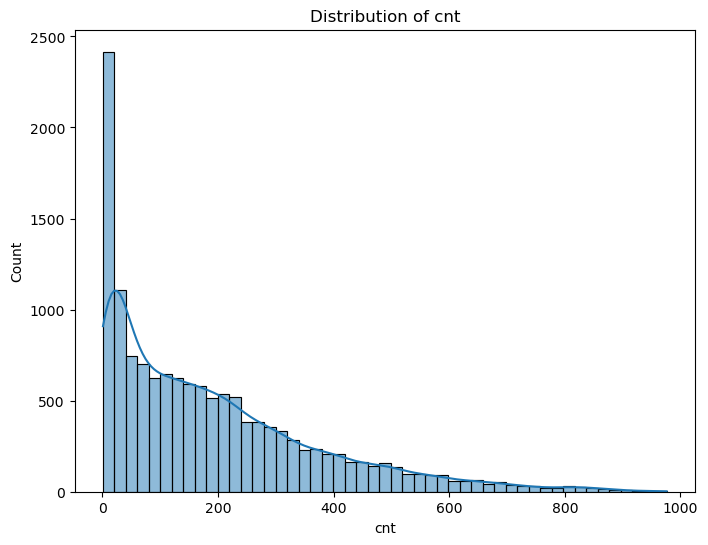

In [843]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train_count, kde=True)
plt.title('Distribution of cnt')
plt.show()

Boxplot of all categorical features in the dataset.

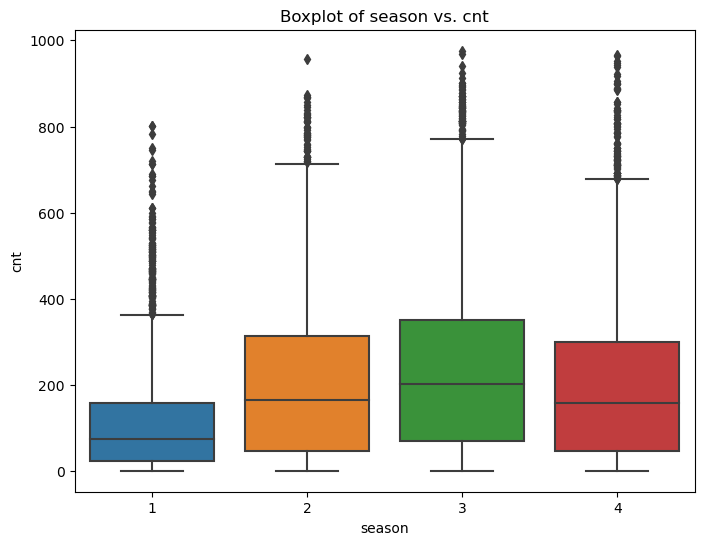

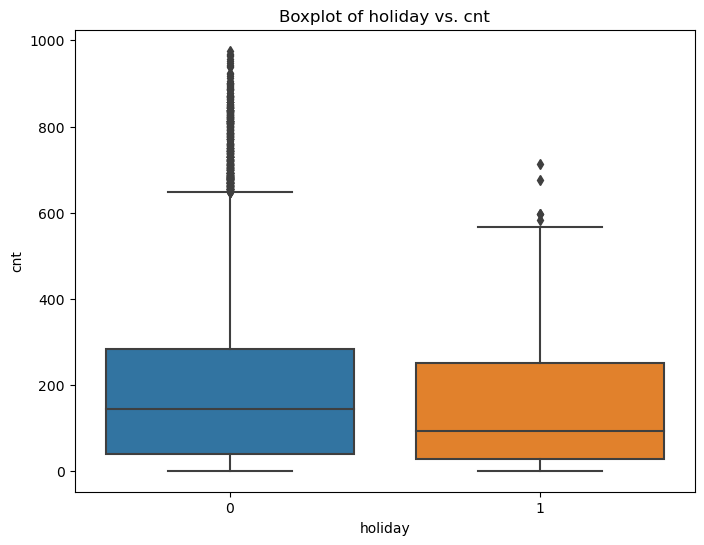

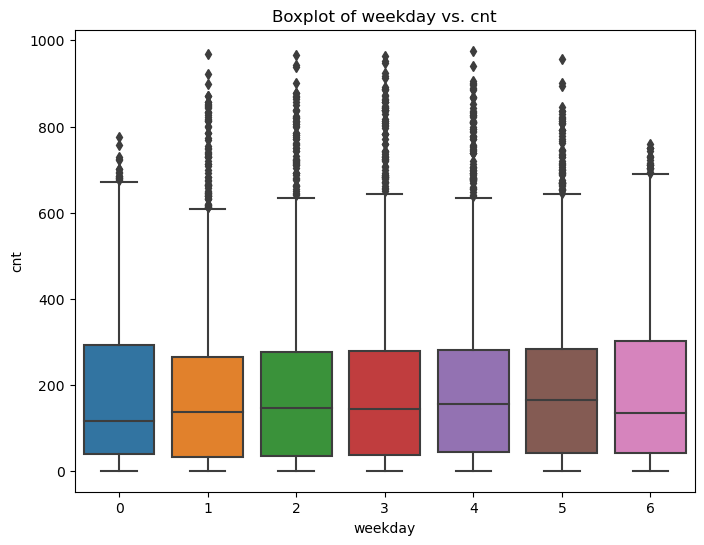

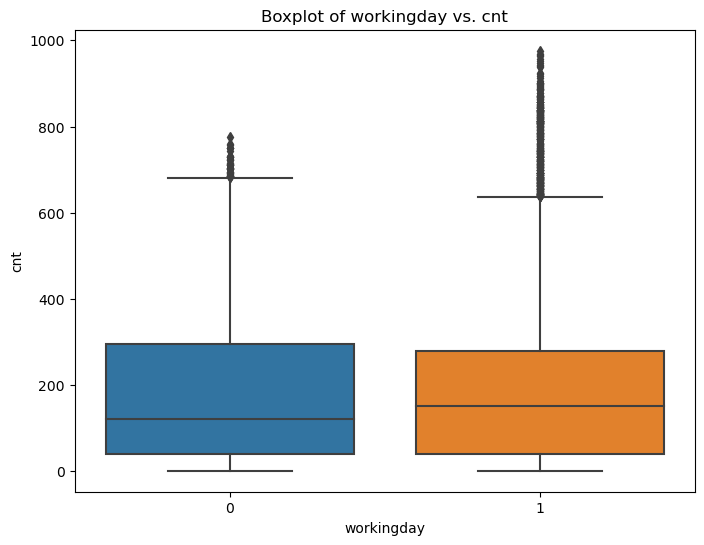

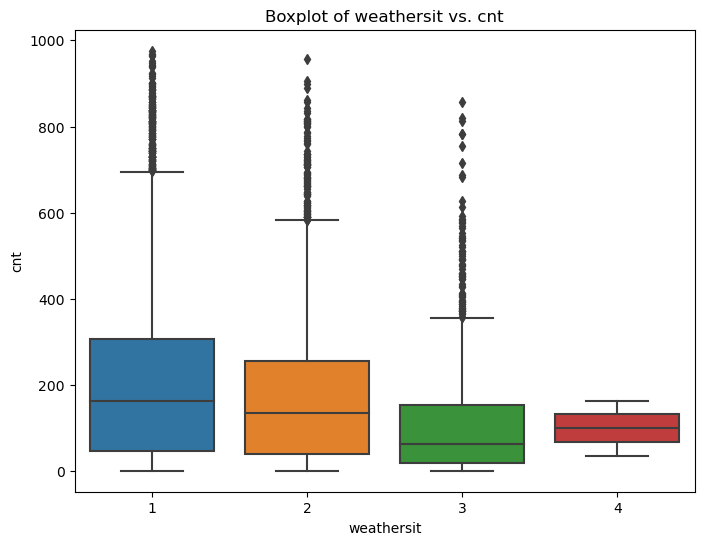

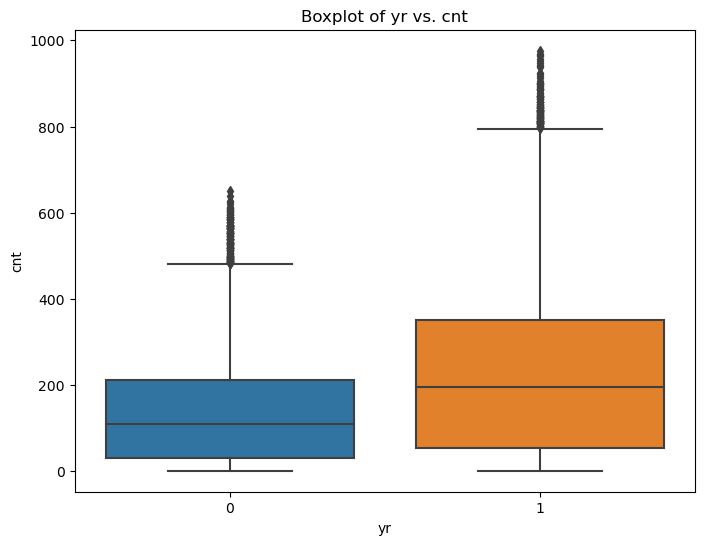

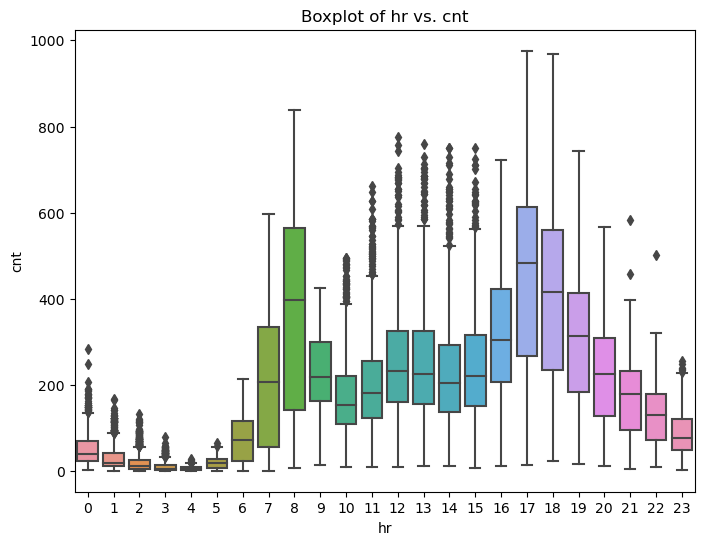

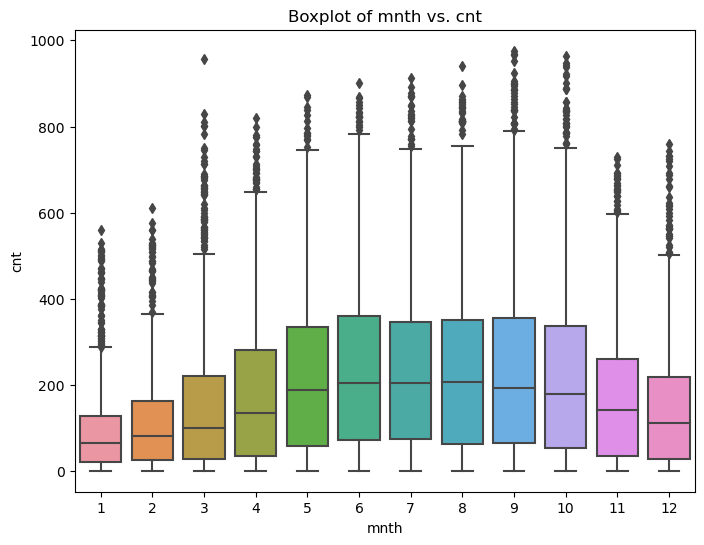

In [844]:
categorical_features = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'yr', 'hr', 'mnth']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y=y_train_count, data=pd.concat([X_train_count, y_train_count], axis=1))
    plt.title(f'Boxplot of {feature} vs. cnt')
    plt.show()

Boxplot of all numerical features.

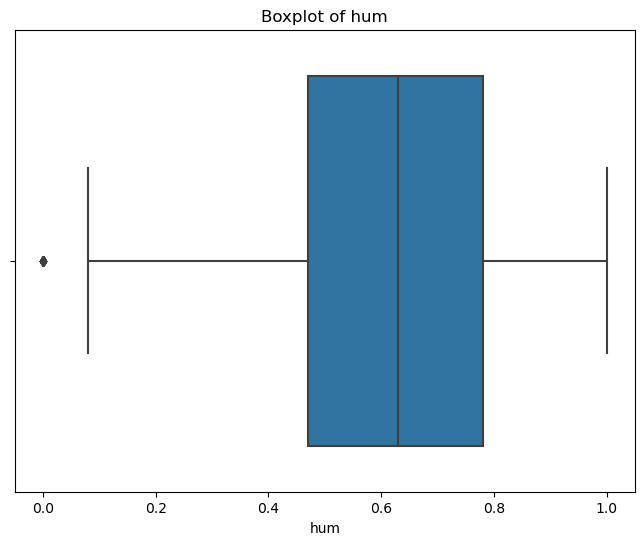

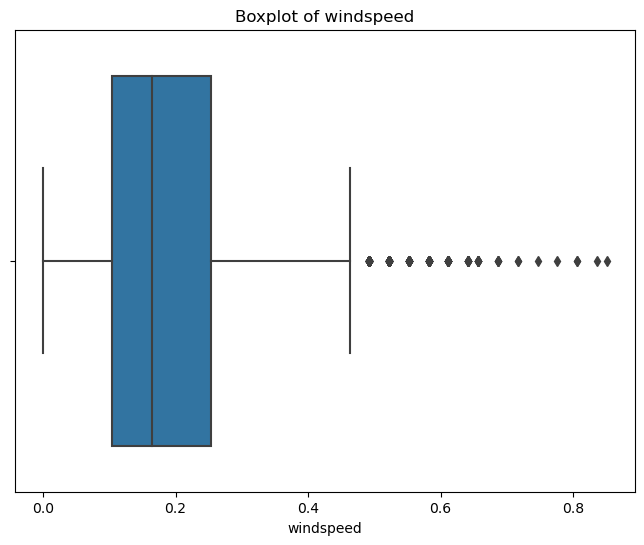

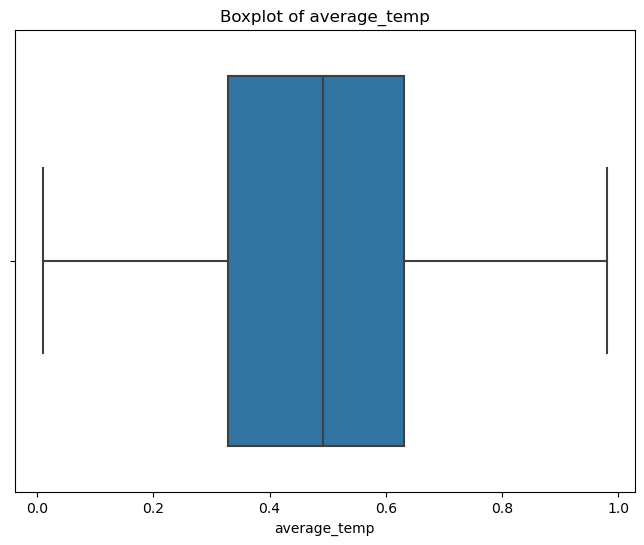

In [845]:
numerical_features = X_train_count.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, data=X_train_count)
    plt.title(f'Boxplot of {feature}')
    plt.show()

Histogram of all numerical features.

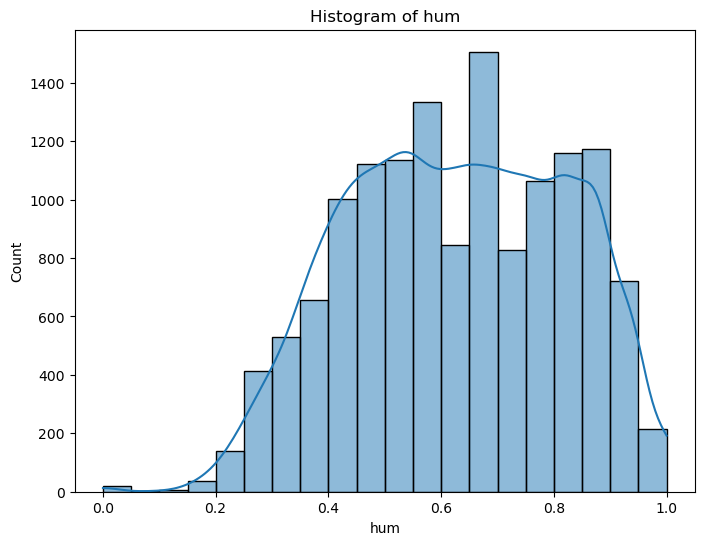

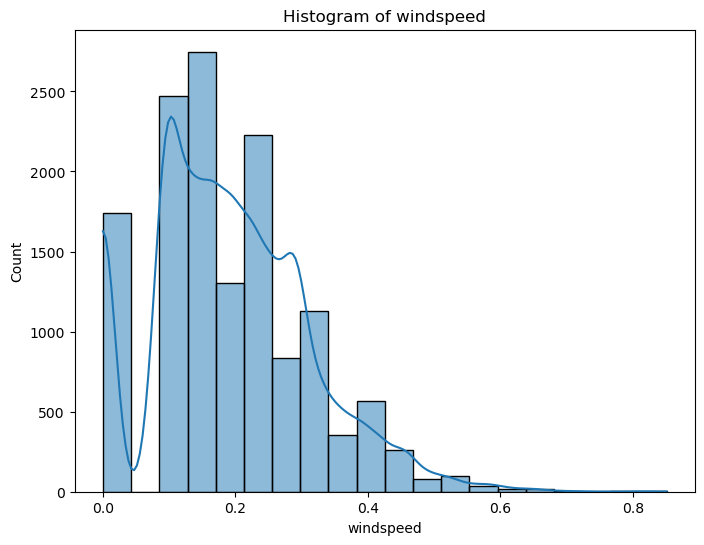

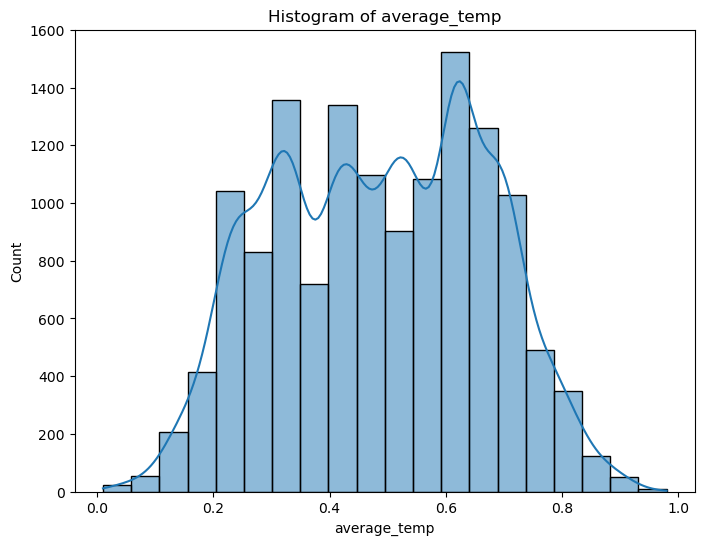

In [846]:
numerical_features = X_train_count.select_dtypes(include=[np.number]).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X_train_count[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

Checking correlation between all numberical features.

In [847]:
corr = X_train_count.select_dtypes(include=[np.number]).corr()
corr

,hum,windspeed,average_temp
hum,1.000000,-0.291785,-0.066835
windspeed,-0.291785,1.000000,-0.043886
average_temp,-0.066835,-0.043886,1.000000


Correlation heatmap of all numerical features.

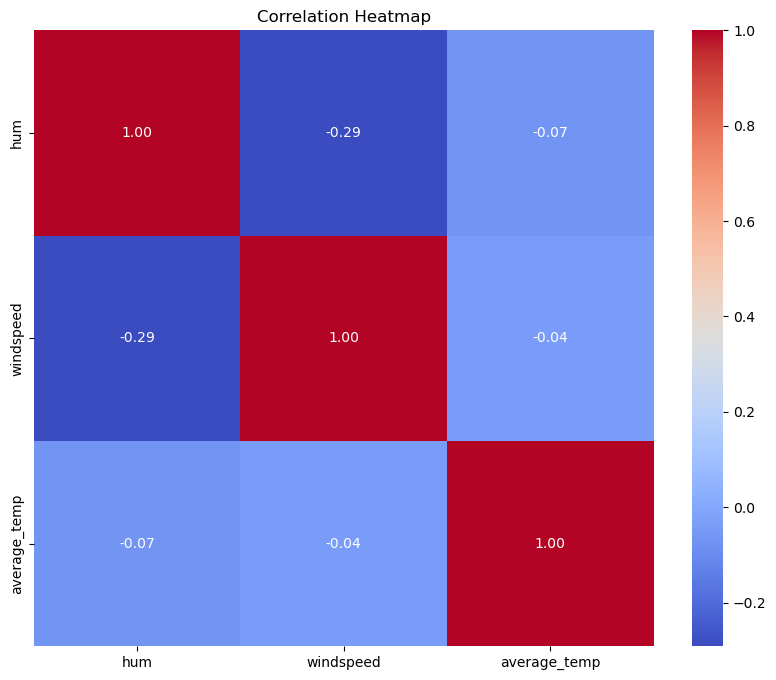

In [848]:
# Select only numeric columns from the training set
numeric_columns = X_train_count.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Checking correlation between all numerical features using the spearman method.

In [849]:
corr = X_train_count.select_dtypes(include=[np.number]).corr(method='spearman')
corr

,hum,windspeed,average_temp
hum,1.000000,-0.295753,-0.061965
windspeed,-0.295753,1.000000,-0.024548
average_temp,-0.061965,-0.024548,1.000000


Correlation heatmap of all numerical features using the spearman method.

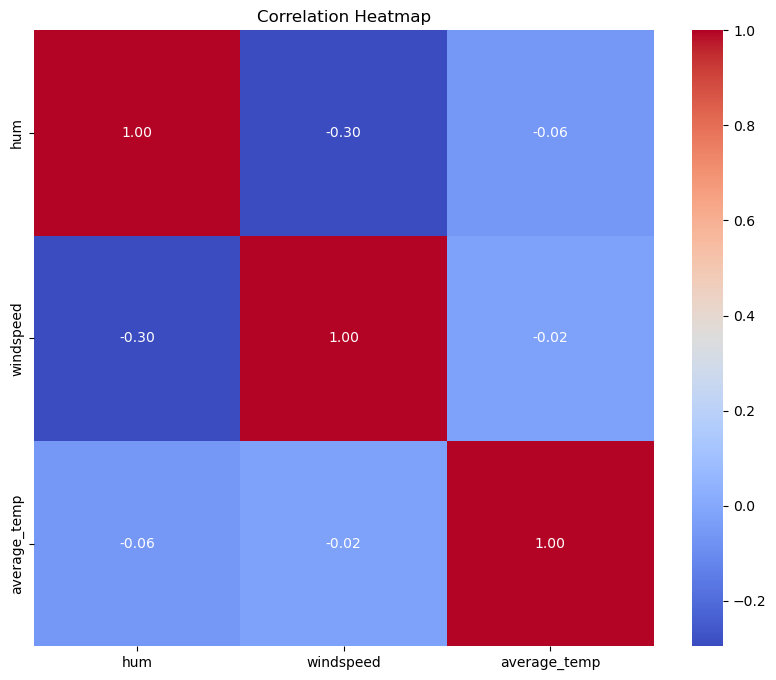

In [850]:
# Select only numeric columns from the training set
numeric_columns = X_train_count.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation heatmap of both categorical and numerical features using phi-k.

<Axes: title={'center': 'Correlation Heatmap'}>

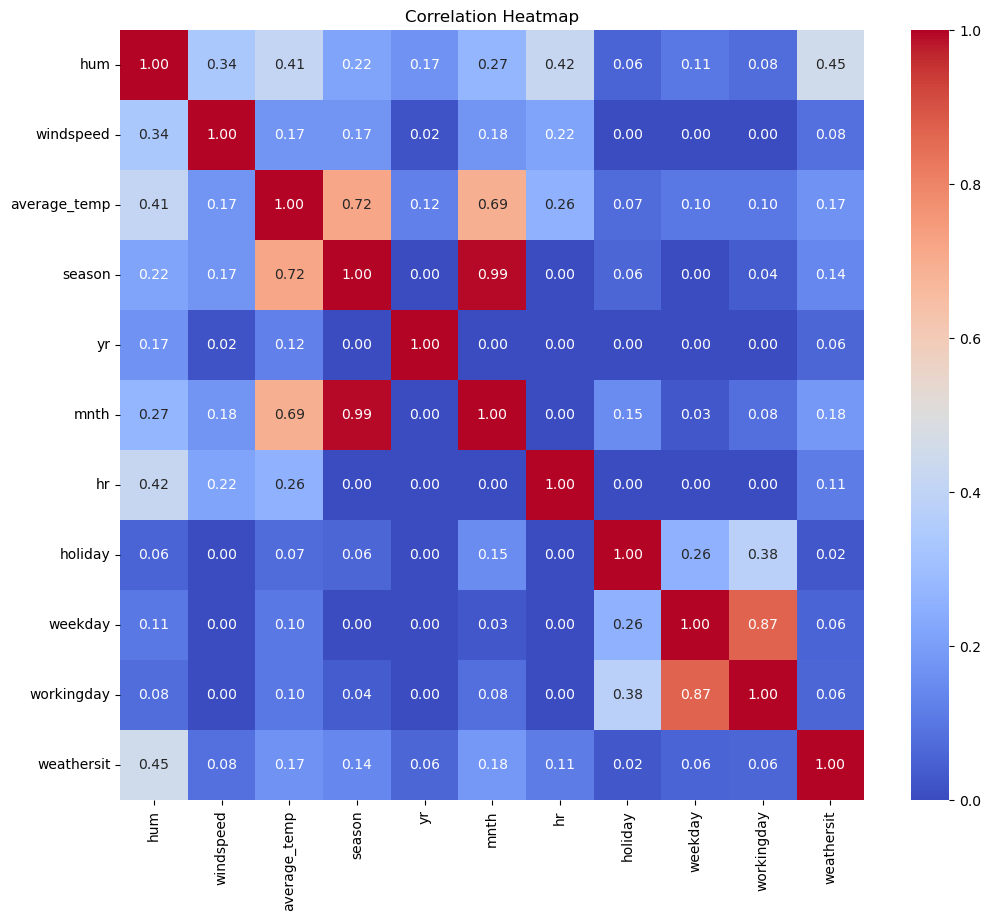

In [851]:
import phik

X_train_numeric = X_train_count.select_dtypes(include=[np.number])

X_train_categorical = X_train_count.select_dtypes(exclude=[np.number])

# Combine both numeric and categorical features
X_train_combined = pd.concat([X_train_numeric, X_train_categorical], axis=1)

correlation_matrix = X_train_combined.phik_matrix(interval_cols=X_train_numeric.columns)
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

##End of Answer 2##

# Task 3: Using a forward selection approach, build a regression model that offers the best performance

##Start of Answer 3##

Creating datasets for casual and registered.

In [852]:
X_train_casual = X_train_count
X_train_registered = X_train_count

In [853]:
X_train_casual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 336 to 15796
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        13903 non-null  category
 1   yr            13903 non-null  category
 2   mnth          13903 non-null  category
 3   hr            13903 non-null  category
 4   holiday       13903 non-null  category
 5   weekday       13903 non-null  category
 6   workingday    13903 non-null  category
 7   weathersit    13903 non-null  category
 8   hum           13903 non-null  float64 
 9   windspeed     13903 non-null  float64 
 10  average_temp  13903 non-null  float64 
dtypes: category(8), float64(3)
memory usage: 545.3 KB


In [854]:
X_train_registered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 336 to 15796
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   season        13903 non-null  category
 1   yr            13903 non-null  category
 2   mnth          13903 non-null  category
 3   hr            13903 non-null  category
 4   holiday       13903 non-null  category
 5   weekday       13903 non-null  category
 6   workingday    13903 non-null  category
 7   weathersit    13903 non-null  category
 8   hum           13903 non-null  float64 
 9   windspeed     13903 non-null  float64 
 10  average_temp  13903 non-null  float64 
dtypes: category(8), float64(3)
memory usage: 545.3 KB


In [855]:
# Create a StandardScaler instance
#scaler = StandardScaler()

# Fit and transform the data using the scaler
#X_scaled = scaler.fit_transform(X_with_constant)

# Display the scaled data
#print(pd.DataFrame(data=X_scaled))

Using forward selection to determine which features are best to use for the regression model for count.

In [856]:
# Initialize an empty list to store selected features
selected_features = []

max_features = len(X_train_count.columns)

best_error = float('inf')

for i in range(max_features):
    # Get the remaining features
    remaining_features = [feature for feature in X_train_count.columns if feature not in selected_features]
    
    # Iterate over the remaining features
    for feature in remaining_features:
        # Add the current feature to the selected features
        current_features = selected_features + [feature]
        
        # Fit the model with the current features
        X_current = X_train_count[current_features]
        X_current = sm.add_constant(X_current)  # Add a constant term for intercept
        model = sm.OLS(y_train_count, X_current).fit()
        
        # Use the fitted model to predict the test target values
        X_test_current = X_test_count[current_features]
        X_test_current = sm.add_constant(X_test_current)  # Add a constant term for intercept
        yHat_test = model.predict(X_test_current)
        
        # Compute the Root-Mean-Square difference between predicted and actual test values
        error = mean_squared_error(y_test_count, yHat_test, squared=False)
        
        # Check if the error is smaller than the best error
        if error < best_error:
            best_error = error
            best_feature = feature
    
    # Add the best feature to the selected features
    selected_features.append(best_feature)
    
    # Print the selected features and current error at each step
    print(f"Step {i + 1}: Added {best_feature}, RMSE: {best_error:.4f}")

# Print the summary of the final model
print("Selected Features:", selected_features)
print("Lowest Prediction Error (RMSE):", best_error)

Step 1: Added average_temp, RMSE: 162.3429
Step 2: Added hr, RMSE: 149.6289
Step 3: Added hum, RMSE: 144.6699
Step 4: Added yr, RMSE: 140.2939
Step 5: Added season, RMSE: 139.4923
Step 6: Added windspeed, RMSE: 139.3716
Step 7: Added weekday, RMSE: 139.2954
Step 8: Added workingday, RMSE: 139.2764
Step 9: Added weathersit, RMSE: 139.2604
Step 10: Added holiday, RMSE: 139.2511
Step 11: Added holiday, RMSE: 139.2511
Selected Features: ['average_temp', 'hr', 'hum', 'yr', 'season', 'windspeed', 'weekday', 'workingday', 'weathersit', 'holiday', 'holiday']
Lowest Prediction Error (RMSE): 139.2510729676341


From forward selection it shows that average_temp, hr, hum, yr, and season are the best features for the model beacuse the root mean squared error changes slightly when adding any extra features.

Creating model for count using the best features taken from forward selection.

In [857]:
X_train_count_model = X_train_count[['average_temp','hr','yr','hum','season']] 

# Add a constant term for intercept
X_train_count_model = sm.add_constant(X_train_count_model)

# Fit the model
count_model = sm.OLS(y_train_count, X_train_count_model).fit()

# Print the summary of the model
print(count_model.summary())


X_test_count = X_test_count[['average_temp','hr','yr','hum','season']]  
X_test_count = sm.add_constant(X_test_count)
# Use the fitted model to predict the test target values
y_pred_train_count = count_model.predict(X_test_count)

# Compute the Root-Mean-Square Error
rmse_count = np.sqrt(mean_squared_error(y_test_count, y_pred_train_count))

# Print the RMSE
print(f"Root Mean Squared Error for the Count model: {rmse_count:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1756.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:46:08   Log-Likelihood:                -88692.
No. Observations:               13903   AIC:                         1.774e+05
Df Residuals:                   13897   BIC:                         1.774e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.0736      6.396     -0.793   

R-squared value is 0.387 and RMSE is 139.4923. This model is not the best since the r squared value is low and RMSE is high.

Plotting the residuals of the count model against average_temp.

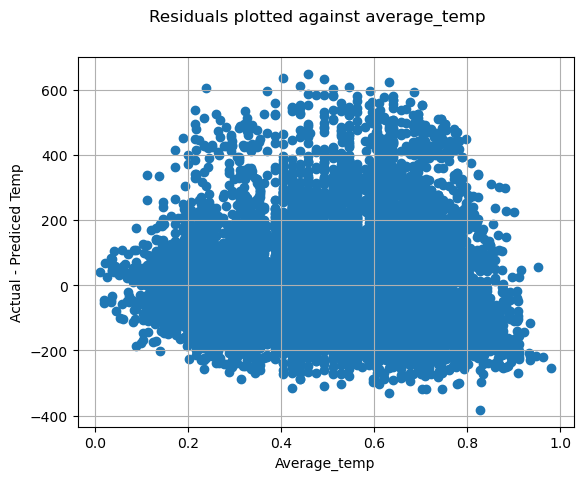

In [858]:
residuals = count_model.resid
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_train_count.average_temp, residuals)
fig.suptitle("Residuals plotted against average_temp")
ax.set_ylabel('Actual - Prediced Temp')
ax.set_xlabel('Average_temp')
ax.grid(True)

From the scatter plot above you can see the residuals are centered around zero, there is no obvious patterns, lowest temp and highest temp have neverb been reached, most residuals are between 0.2 and 0.8, and there are no obvious outliers.

Plotting the residuals of the count model against average_temp and hum.

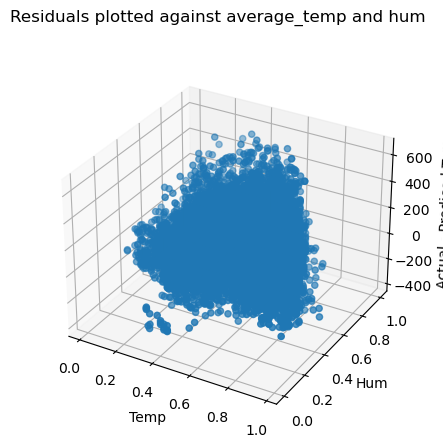

In [859]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_count.average_temp, X_train_count.hum, residuals)
fig.suptitle("Residuals plotted against average_temp and hum")
ax.set_zlabel('Actual - Prediced Temp')
ax.set_ylabel('Hum')
ax.set_xlabel('Temp')
ax.grid(True)

Q-Q plot to verify the residuals distribution

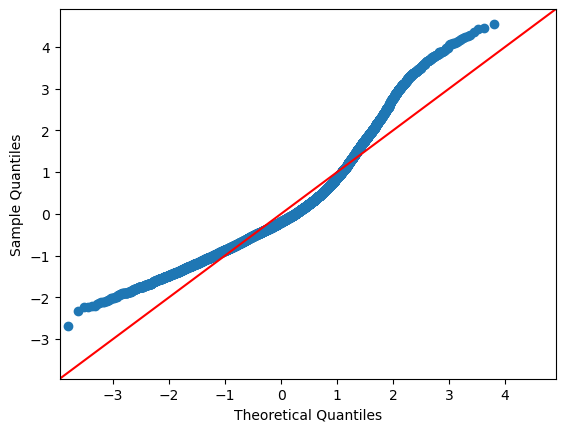

In [860]:
fig = sm.qqplot(residuals, fit=True, line = '45')

The qq plot above shows that the data is not normally distributed because it bends up at the left and bends downwards at the right, this means there are more extreme values that expected.

distplot of residuals

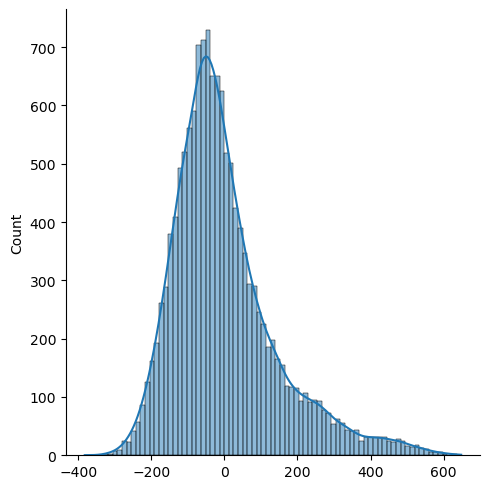

In [861]:
sns_plot = sns.displot(x = residuals, kde=True)

The distplot above shows that the data is normally distributed then extends at the right.

Using forward selection to determine which features are best to use for the regression model for casual.

In [862]:
# Initialize an empty list to store selected features
selected_features = []

max_features = len(X_train_casual.columns)

# Initialize variables to store the best model and its corresponding error
best_model = None
best_error = float('inf')

for i in range(max_features):
    # Get the remaining features
    remaining_features = [feature for feature in X_train_casual.columns if feature not in selected_features]
    
    # Iterate over the remaining features
    for feature in remaining_features:
        # Add the current feature to the selected features
        current_features = selected_features + [feature]
        
        # Fit the model with the current features
        X_current = X_train_casual[current_features]
        X_current = sm.add_constant(X_current)  # Add a constant term for intercept
        model = sm.OLS(y_train_casual, X_current).fit()
        
        # Use the fitted model to predict the test target values
        X_test_current = X_test_casual[current_features]
        X_test_current = sm.add_constant(X_test_current)  # Add a constant term for intercept
        yHat_test = model.predict(X_test_current)
        
        # Compute the Root-Mean-Square difference between predicted and actual test values
        error = mean_squared_error(y_test_casual, yHat_test, squared=False)
        
        # Check if the error is smaller than the best error
        if error < best_error:
            best_error = error
            best_feature = feature
    
    # Add the best feature to the selected features
    selected_features.append(best_feature)
    
    # Print the selected features and current error at each step
    print(f"Step {i + 1}: Added {best_feature}, RMSE: {best_error:.4f}")

# Print the summary of the final model
print("Selected Features:", selected_features)
print("Lowest Prediction Error (RMSE):", best_error)

Step 1: Added average_temp, RMSE: 42.6708
Step 2: Added hum, RMSE: 39.5429
Step 3: Added workingday, RMSE: 36.6477
Step 4: Added hr, RMSE: 35.7670
Step 5: Added yr, RMSE: 35.4633
Step 6: Added weekday, RMSE: 35.4134
Step 7: Added season, RMSE: 35.3676
Step 8: Added weathersit, RMSE: 35.3283
Step 9: Added windspeed, RMSE: 35.3243
Step 10: Added mnth, RMSE: 35.3235
Step 11: Added mnth, RMSE: 35.3235
Selected Features: ['average_temp', 'hum', 'workingday', 'hr', 'yr', 'weekday', 'season', 'weathersit', 'windspeed', 'mnth', 'mnth']
Lowest Prediction Error (RMSE): 35.32353530327173


From forward selection it shows that average_temp, hum, workingday, hr, and weekday are the best features for the model beacuse the root mean squared error changes slightly when adding any extra features.

Creating model for casual using the best features taken from forward selection.

In [863]:
X_train_casual_model = X_train_casual[['average_temp','hum','workingday','hr','weekday']] 

# Add a constant term for intercept
X_train_casual_model = sm.add_constant(X_train_casual_model)

# Fit the model
casual_model = sm.OLS(y_train_casual, X_train_casual_model).fit()

# Print the summary of the model
print(casual_model.summary())

X_test_casual = X_test_casual[['average_temp','hum','workingday','hr','weekday']] 
X_test_casual = sm.add_constant(X_test_casual)
# Use the fitted model to predict the test target values
y_pred_train_casual = casual_model.predict(X_test_casual)

# Compute the Root-Mean-Square Error
rmse_casual = np.sqrt(mean_squared_error(y_test_casual, y_pred_train_casual))
print(f"Root Mean Squared Error for the model: {rmse_casual:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 casual   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2196.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:46:10   Log-Likelihood:                -69967.
No. Observations:               13903   AIC:                         1.399e+05
Df Residuals:                   13897   BIC:                         1.400e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.7552      1.713     16.198   

R-squared value is 0.441 and RMSE is 35.7190. This model is good but can be better since the r squared value is low.

Plotting the residuals of the casual model against average_temp.

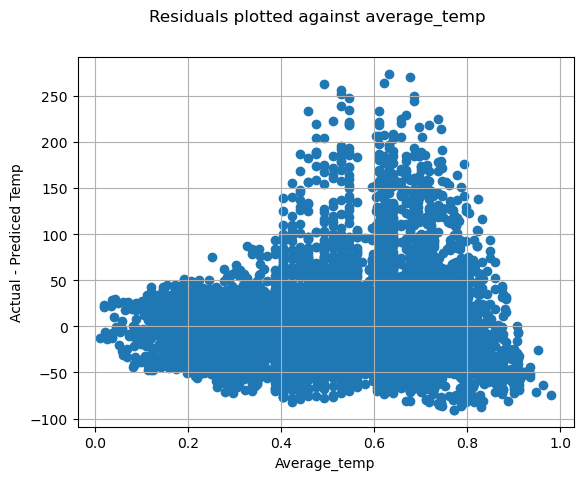

In [864]:
residuals = casual_model.resid
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_train_casual.average_temp, residuals)
fig.suptitle("Residuals plotted against average_temp")
ax.set_ylabel('Actual - Prediced Temp')
ax.set_xlabel('Average_temp')
ax.grid(True)

From the scatter plot above you can see the residuals are centered around zero, then some outliers between 0.4 and 0.8, lowest temp and highest temp have never been reached.

Plotting the residuals of the casual model against average_temp and hum.

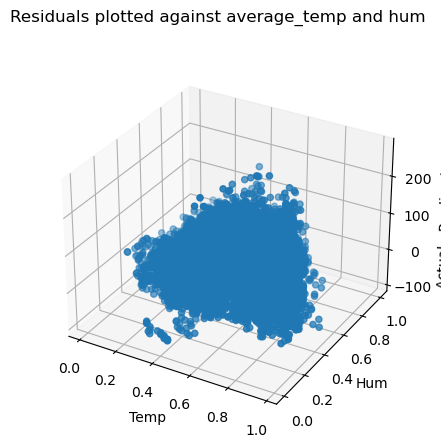

In [865]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_casual.average_temp, X_train_casual.hum, residuals)
fig.suptitle("Residuals plotted against average_temp and hum")
ax.set_zlabel('Actual - Prediced Temp')
ax.set_ylabel('Hum')
ax.set_xlabel('Temp')
ax.grid(True)

Q-Q plot to verify the residuals distribution

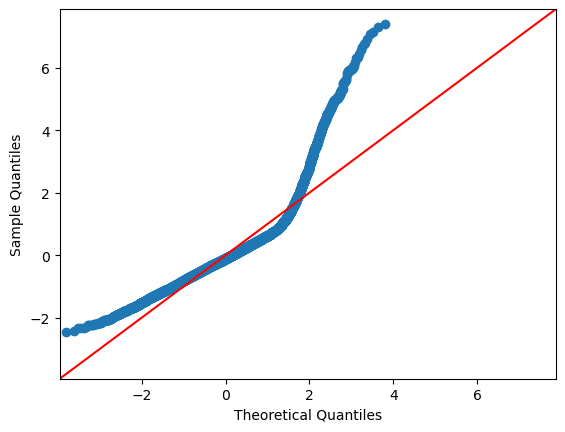

In [866]:
fig = sm.qqplot(residuals, fit=True, line = '45')

The qq plot above shows that the data is not normally distributed because it bends up at the left and bends up then starts bending downwards at the right, this means there are more extreme values that expected.

distplot of residuals

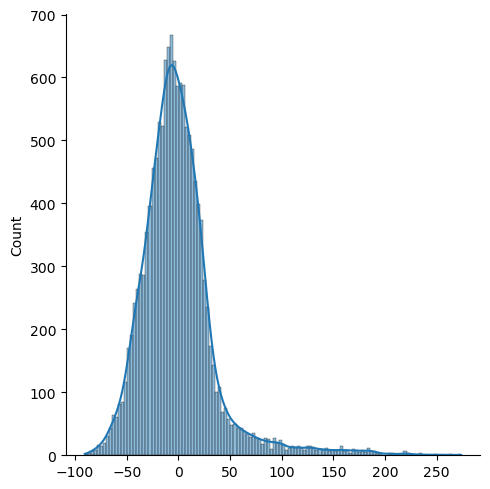

In [867]:
sns_plot = sns.displot(x = residuals, kde=True)

The distplot above shows that the data is normally distributed then shows outliers at the right.

Using forward selection to determine which features are best to use for the regression model for registered.

In [868]:
# Initialize an empty list to store selected features
selected_features = []

max_features = len(X_train_registered.columns)

# Initialize variables to store the best model and its corresponding error
best_model = None
best_error = float('inf')

for i in range(max_features):
    # Get the remaining features
    remaining_features = [feature for feature in X_train_registered.columns if feature not in selected_features]
    
    # Iterate over the remaining features
    for feature in remaining_features:
        # Add the current feature to the selected features
        current_features = selected_features + [feature]
        
        # Fit the model with the current features
        X_current = X_train_registered[current_features]
        X_current = sm.add_constant(X_current)  # Add a constant term for intercept
        model = sm.OLS(y_train_registered, X_current).fit()
        
        # Use the fitted model to predict the test target values
        X_test_current = X_test_registered[current_features]
        X_test_current = sm.add_constant(X_test_current)  # Add a constant term for intercept
        yHat_test = model.predict(X_test_current)
        
        # Compute the Root-Mean-Square difference between predicted and actual test values
        error = mean_squared_error(y_test_registered, yHat_test, squared=False)
        
        # Check if the error is smaller than the best error
        if error < best_error:
            best_error = error
            best_feature = feature
    
    # Add the best feature to the selected features
    selected_features.append(best_feature)
    
    # Print the selected features and current error at each step
    print(f"Step {i + 1}: Added {best_feature}, RMSE: {best_error:.4f}")

# Print the summary of the final model
print("Selected Features:", selected_features)
print("Lowest Prediction Error (RMSE):", best_error)

Step 1: Added hr, RMSE: 137.1899
Step 2: Added average_temp, RMSE: 129.8655
Step 3: Added yr, RMSE: 125.7668
Step 4: Added hum, RMSE: 123.7168
Step 5: Added workingday, RMSE: 122.4691
Step 6: Added season, RMSE: 121.7899
Step 7: Added windspeed, RMSE: 121.6906
Step 8: Added weathersit, RMSE: 121.6346
Step 9: Added weekday, RMSE: 121.6061
Step 10: Added holiday, RMSE: 121.6007
Step 11: Added holiday, RMSE: 121.6007
Selected Features: ['hr', 'average_temp', 'yr', 'hum', 'workingday', 'season', 'windspeed', 'weathersit', 'weekday', 'holiday', 'holiday']
Lowest Prediction Error (RMSE): 121.60067072587823


From forward selection it shows that hr, average_temp, yr, hum, workingday, and season are the best features for the model beacuse the root mean squared error changes slightly when adding any extra features.

In [869]:
X_train_registered_model = X_train_registered[['hr','average_temp','yr','hum','workingday','season']]

# Add a constant term for intercept
X_train_registered_model= sm.add_constant(X_train_registered_model)

# Fit the model
registered_model = sm.OLS(y_train_registered, X_train_registered_model).fit()

# Print the summary of the model
print(registered_model.summary())


X_test_registered = X_test_registered[['hr','average_temp','yr','hum','workingday','season']] 
X_test_registered = sm.add_constant(X_test_registered)
# Use the fitted model to predict the test target values
y_pred_train = registered_model.predict(X_test_registered)

# Compute the Root-Mean-Square Error
rmse_registered = np.sqrt(mean_squared_error(y_test_registered, y_pred_train))
print(f"Root Mean Squared Error for the model: {rmse_registered:.4f}")

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:46:12   Log-Likelihood:                -86739.
No. Observations:               13903   AIC:                         1.735e+05
Df Residuals:                   13896   BIC:                         1.735e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -31.3357      5.717     -5.481   

R-squared value is 0.335 and RMSE is 121.7899. This model is not the best since the r squared value is low and RMSE is high.

Plotting the residuals of the registered model against average_temp.

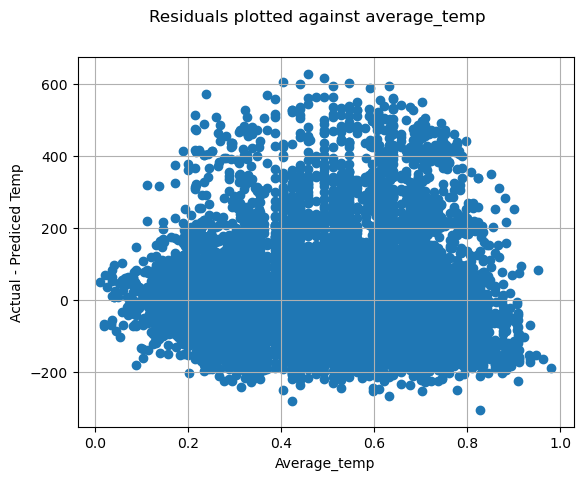

In [870]:
residuals = registered_model.resid
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(X_train_registered.average_temp, residuals)
fig.suptitle("Residuals plotted against average_temp")
ax.set_ylabel('Actual - Prediced Temp')
ax.set_xlabel('Average_temp')
ax.grid(True)

From the scatter plot above you can see the residuals are centered around zero, there is no obvious patterns, lowest temp and highest temp have neverb been reached, most residuals are between 0.2 and 0.8, and there are no obvious outliers.

Plotting the residuals of the registered model against average_temp and hum.

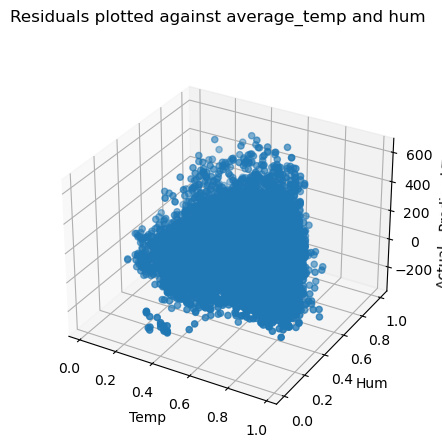

In [871]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_casual.average_temp, X_train_casual.hum, residuals)
fig.suptitle("Residuals plotted against average_temp and hum")
ax.set_zlabel('Actual - Prediced Temp')
ax.set_ylabel('Hum')
ax.set_xlabel('Temp')
ax.grid(True)

Q-Q plot to verify the residuals distribution

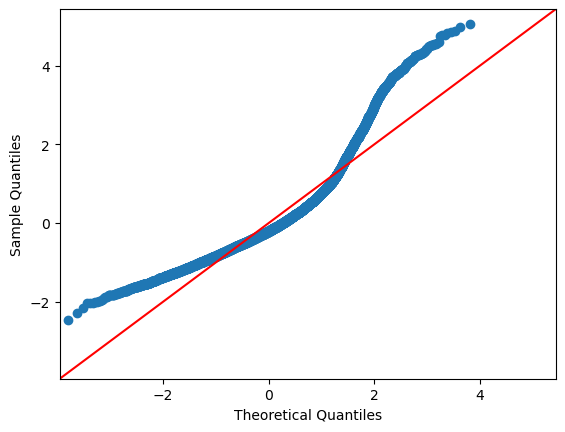

In [872]:
fig = sm.qqplot(residuals, fit=True, line = '45')

The qq plot above shows that the data is not normally distributed because it bends up at the left and starts to bend down and bends downwards at the right, this means there are more extreme values that expected.

distplot of residuals

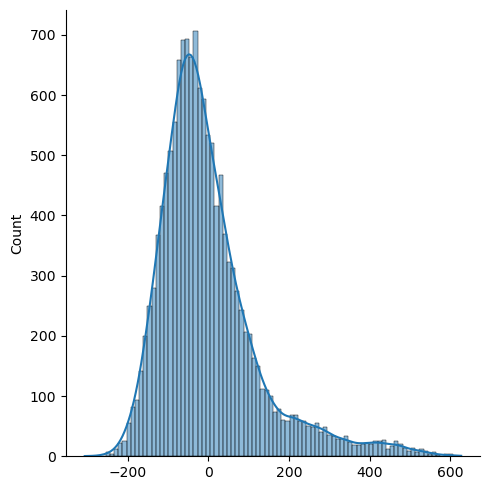

In [873]:
sns_plot = sns.displot(x = residuals, kde=True)

The distplot above shows that the data is normally distributed then extends at the right.

Doing 10-fold cross validation on root mean squared error on all models.

In [874]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

models = {
    'Count': (count_model, X_train_count, y_train_count),
    'Casual': (casual_model, X_train_casual, y_train_casual),
    'Registered': (registered_model, X_train_registered, y_train_registered),
}

for name, (model, X, y) in models.items():
    clf = LinearRegression()
    scores = cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    
    print(f"Cross-validated RMSE for {name} model:")
    print(rmse_scores)
    print(f"Average RMSE for {name} model: {np.mean(rmse_scores):.4f}")
    print()

Cross-validated RMSE for Count model:
[141.67651158 136.94653475 146.58646045 139.94658673 139.60135434
 140.54798876 147.13100399 146.84715987 147.97527143 137.7876918 ]
Average RMSE for Count model: 142.5047

Cross-validated RMSE for Casual model:
[37.84602657 37.65547775 34.52632442 39.23985904 34.86279299 35.52514507
 37.05413328 36.73272452 35.25700607 37.59454144]
Average RMSE for Casual model: 36.6294

Cross-validated RMSE for Registered model:
[123.35138589 117.56150739 129.01473096 118.15478774 121.34157755
 122.77345219 127.92170254 129.43826496 130.27504648 118.66583772]
Average RMSE for Registered model: 123.8498



The root mean squared error seems to be accurate across all of my models because the rmse values are close to my rmse values of my models.

Doing 10-fold cross validation on R-squared value on all models.

In [875]:
for name, (model, X, y) in models.items():
    clf = LinearRegression()
    r2_scores = cross_val_score(clf, X, y, cv=10, scoring='r2')
    
    print(f"Cross-validated R-squared for {name} model:")
    print(r2_scores)
    print(f"Average R-squared for {name} model: {np.mean(r2_scores):.4f}")
    print()

Cross-validated R-squared for Count model:
[0.37149795 0.42521692 0.36036881 0.37308346 0.37505977 0.40859096
 0.39387716 0.37436235 0.38960567 0.40313929]
Average R-squared for Count model: 0.3875

Cross-validated R-squared for Casual model:
[0.46230727 0.46028092 0.45055311 0.42078859 0.45631979 0.48170556
 0.45671799 0.46994733 0.43945226 0.44605561]
Average R-squared for Casual model: 0.4544

Cross-validated R-squared for Registered model:
[0.31015907 0.37237702 0.31362899 0.32336125 0.32241375 0.35421029
 0.34606906 0.31571835 0.34193691 0.34877297]
Average R-squared for Registered model: 0.3349



The R-squared value seems to be accurate across all of my models becayse the R-squared values are close to the R-squared vales of my models.

##End of Answer 3##

# Task 4: Which of the 3 target columns is easiest to predict accurately?

##Start of Answer 4##

To determine which target column is the easiest to predict accurately, you can consider multiple factors, including the R-squared value and the Root Mean Squared Error (RMSE).

Count Model:
R-squared: 0.387
RMSE: 139.4923

Casual Model:
R-squared: 0.441
RMSE: 35.7190

Registered Model:
R-squared: 0.335
RMSE: 121.7899

A higher R-squared value indicates a better fit of the model to the data. Lower RMSE values indicate better predictive accuracy. Considering these factors:

The Casual Model has the highest R-squared value (0.441), suggesting that it explains a larger proportion of the variance in the target variable.

The Count Model has the highest RMSE (139.4923), indicating higher prediction errors compared to the other models.

The Registered Model falls in between, with an R-squared value of 0.335 and an RMSE of 121.7899.

Based on this information, it seems that the Casual Model is performing relatively better in terms of both R-squared and RMSE. Therefore, predicting the "casual" column might be considered the easiest among the three.

##End of Answer 4##

# Task 5: Using this "preferred target", derive a new target whose values are the grouped label.

##Start of Answer 5##

Merging casual with the casual dataset so i can derive a new target.

In [876]:
X_train_casual = pd.merge(X_train_casual, hourly[['casual']], left_index=True, right_index=True)

Deriving a new target casual_group based on the quartiles of casual.

In [877]:
# Define quartile end points for 'casual' column
quartiles_casual = X_train_casual['casual'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

# Define bin labels for 'casual' column based on quartiles
bin_labels_casual = ['Q1', 'Q2', 'Q3', 'Q4']

# Create a new column with grouped labels for 'casual' column
X_train_casual['casual_group'] = pd.cut(X_train_casual['casual'], bins=quartiles_casual, labels=bin_labels_casual, right=False)

# Display the new dataframe with the 'casual_group' column
X_train_casual

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,hum,windspeed,average_temp,casual,casual_group
instant,,,,,,,,,,,,,
336,1,0,1,11,0,6,0,1,0.55,0.2239,0.19850,18,Q3
7036,4,0,10,18,0,2,1,1,0.42,0.1045,0.51000,65,Q4
8052,4,0,12,3,0,3,1,3,1.00,0.2239,0.45725,0,Q1
2134,2,0,4,18,0,0,0,2,0.31,0.0000,0.45725,71,Q4
8486,1,0,12,6,0,0,0,1,0.75,0.1045,0.21365,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11285,2,1,4,9,0,5,1,1,0.88,0.0896,0.45725,30,Q3
11965,2,1,5,17,0,5,1,1,0.34,0.1343,0.64060,124,Q4
5391,3,0,8,12,0,3,1,1,0.43,0.2836,0.76365,26,Q3


Checking for null values in casual dataset.

In [878]:
X_train_casual.isnull().sum()

season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
hum             0
windspeed       0
average_temp    0
casual          0
casual_group    1
dtype: int64

Checking for the mean casual value.

In [879]:
print(X_train_casual.describe())

                hum     windspeed  average_temp        casual
count  13903.000000  13903.000000  13903.000000  13903.000000
mean       0.627011      0.189822      0.486790     36.002374
std        0.192801      0.122293      0.182086     49.636195
min        0.000000      0.000000      0.010000      0.000000
25%        0.470000      0.104500      0.329100      4.000000
50%        0.630000      0.164200      0.492400     17.000000
75%        0.780000      0.253700      0.630600     49.000000
max        1.000000      0.850700      0.980000    367.000000


Since the mean casual value is in the Q2 threshold i assigned the missing value to Q2

In [880]:
X_train_casual['casual_group'].fillna('Q2', inplace=True)

No more null values in casual dataset.

In [881]:
X_train_casual.isnull().sum()

season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
hum             0
windspeed       0
average_temp    0
casual          0
casual_group    0
dtype: int64

##End of Answer 5##

# Task 6: Use _two_ classification procedures to predict these demand quartiles.

##Start of Answer 6

In [882]:
X = X_train_casual.drop(['casual_group','casual'], axis=1)
y = X_train_casual['casual_group']

In [883]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Forward selection on k-nearest neighbours classifier, perform cross validation to get the best score and use the mean of best scores to calculate best feature with best accuracy.

In [884]:
from sklearn.neighbors import KNeighborsClassifier

target_column = 'casual_group'

selected_features_knn = []

max_features = len(X_train.columns)

best_model_knn = None
best_accuracy_knn = 0

for i in range(max_features):
    remaining_features_knn = [feature for feature in X_train.columns if feature not in selected_features_knn]
    
    # K-Nearest Neighbors
    for feature in remaining_features_knn:
        # Add the current feature to the selected features
        current_features = selected_features_knn + [feature]
        
        # Fit the KNN model with the current features
        X_current = X_train[current_features]
        knn_model = KNeighborsClassifier()
        scores = cross_val_score(knn_model, X_current, y_train, cv=5, scoring='accuracy')
        accuracy = np.mean(scores)
        
        # Check if the accuracy is higher than the best accuracy
        if accuracy > best_accuracy_knn:
            best_accuracy_knn = accuracy
            best_feature_knn = feature
    
    # Add the best feature to the selected features for KNN
    selected_features_knn.append(best_feature_knn)
    
    # Print the selected features and current accuracy at each step for KNN
    print(f"K-Nearest Neighbors - Step {i + 1}: Added {best_feature_knn}, Accuracy: {best_accuracy_knn:.4f}")

# Print the selected features and best accuracy for KNN
print("\nK-Nearest Neighbors - Selected Features:", selected_features_knn)
print("Best Accuracy:", best_accuracy_knn)

K-Nearest Neighbors - Step 1: Added hr, Accuracy: 0.4514
K-Nearest Neighbors - Step 2: Added average_temp, Accuracy: 0.6064
K-Nearest Neighbors - Step 3: Added weekday, Accuracy: 0.6687
K-Nearest Neighbors - Step 4: Added yr, Accuracy: 0.6807
K-Nearest Neighbors - Step 5: Added mnth, Accuracy: 0.6968
K-Nearest Neighbors - Step 6: Added weathersit, Accuracy: 0.7138
K-Nearest Neighbors - Step 7: Added workingday, Accuracy: 0.7179
K-Nearest Neighbors - Step 8: Added workingday, Accuracy: 0.7179
K-Nearest Neighbors - Step 9: Added workingday, Accuracy: 0.7179
K-Nearest Neighbors - Step 10: Added workingday, Accuracy: 0.7179
K-Nearest Neighbors - Step 11: Added workingday, Accuracy: 0.7179

K-Nearest Neighbors - Selected Features: ['hr', 'average_temp', 'weekday', 'yr', 'mnth', 'weathersit', 'workingday', 'workingday', 'workingday', 'workingday', 'workingday']
Best Accuracy: 0.7178571428571429


From forward selection it shows that hr, average_temp, weekday, yr, mnth, weathersit, and workingday are the best features for the model beacuse the accuracy does not change when adding any more features.

k-nearest neighbors model using features from forward selection.

In [885]:
X_train_knn = X_train[['hr', 'average_temp','weekday','yr','mnth','weathersit']] 

X_test_knn = X_test[['hr', 'average_temp','weekday','yr','mnth','weathersit']] 

knn_classifier = KNeighborsClassifier()

# Fit the classifier on the training data
knn_classifier.fit(X_train_knn, y_train)

# Predict the target variable for the test set
y_pred_knn = knn_classifier.predict(X_test_knn)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_knn)

# Display the accuracy
print(f"Accuracy of KNN Classifier: {accuracy:.4f}")

Accuracy of KNN Classifier: 0.7166


Accuracy is 0.7166 which means its a good model.

Forward selection on logistic regression, perform cross validation to get the best score and use the mean of best scores to calculate best feature with best accuracy.

In [886]:
from sklearn.linear_model import LogisticRegression

target_column = 'casual_group'

selected_features_logreg = []

max_features = len(X_train.columns)

best_model_logreg = None
best_accuracy_logreg = 0

for i in range(max_features):
    remaining_features_logreg = [feature for feature in X_train.columns if feature not in selected_features_logreg]
    
    # Logistic Regression
    for feature in remaining_features_logreg:
        # Add the current feature to the selected features
        current_features = selected_features_logreg + [feature]
        
        # Fit the logistic regression model with the current features
        X_current = X_train[current_features]
        lr_model = LogisticRegression(max_iter=1000)
        scores = cross_val_score(lr_model, X_current, y_train, cv=5, scoring='accuracy')
        accuracy = np.mean(scores)
        
        # Check if the accuracy is higher than the best accuracy
        if accuracy > best_accuracy_logreg:
            best_accuracy_logreg = accuracy
            best_feature_logreg = feature
    
    # Add the best feature to the selected features for logistic regression
    selected_features_logreg.append(best_feature_logreg)
    
    # Print the selected features and current accuracy at each step for logistic regression
    print(f"Logistic Regression - Step {i + 1}: Added {best_feature_logreg}, Accuracy: {best_accuracy_logreg:.4f}")

# Print the selected features and best accuracy for logistic regression
print("\nLogistic Regression - Selected Features:", selected_features_logreg)
print("Best Accuracy:", best_accuracy_logreg)

Logistic Regression - Step 1: Added average_temp, Accuracy: 0.4156
Logistic Regression - Step 2: Added hr, Accuracy: 0.4952
Logistic Regression - Step 3: Added hum, Accuracy: 0.5245
Logistic Regression - Step 4: Added workingday, Accuracy: 0.5478
Logistic Regression - Step 5: Added yr, Accuracy: 0.5516
Logistic Regression - Step 6: Added season, Accuracy: 0.5534
Logistic Regression - Step 7: Added windspeed, Accuracy: 0.5537
Logistic Regression - Step 8: Added mnth, Accuracy: 0.5540
Logistic Regression - Step 9: Added holiday, Accuracy: 0.5547
Logistic Regression - Step 10: Added holiday, Accuracy: 0.5547
Logistic Regression - Step 11: Added holiday, Accuracy: 0.5547

Logistic Regression - Selected Features: ['average_temp', 'hr', 'hum', 'workingday', 'yr', 'season', 'windspeed', 'mnth', 'holiday', 'holiday', 'holiday']
Best Accuracy: 0.5546684215969542


From forward selection it shows that average_temp, hr, hum, workingday, and season are the best features for the model beacuse the accuracy change slightly when adding any more features.

Logistic regression model with features from forward selection.

In [887]:
X_train_lr = X_train[['average_temp','hr','hum','workingday','season']] 

X_test_lr = X_test[['average_temp','hr','hum','workingday','season']] 

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model on the training data
logistic_model.fit(X_train_lr, y_train)

# Predict the target variable for the test set
y_pred_logistic = logistic_model.predict(X_test_lr)

# Evaluate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Display the accuracy
print(f"Accuracy of Logistic Regression: {accuracy_logistic:.4f}")

Accuracy of Logistic Regression: 0.5599


C:\Users\willi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model is 0.5599 which is ok and can be better.

Doing 10-fold cross validation on the accuracy of logistic regression and k-earest neighbours.

In [888]:
models = {
    'KNN Classifier': (KNeighborsClassifier(), X_train_knn, y_train),
    'Logistic Regression': (LogisticRegression(), X_train_lr, y_train),
}

# Perform 10-fold cross-validation for each model
for name, (model, X, y) in models.items():
    if 'Logistic Regression' in name:
        scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    else:
        scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    
    print(f"Cross-validated accuracy for {name}:")
    print(scores)
    print(f"Average accuracy for {name}: {np.mean(scores):.4f}")
    print()

Cross-validated accuracy for KNN Classifier:
[0.72866128 0.68912848 0.73830935 0.70503597 0.6942446  0.71402878
 0.70323741 0.71492806 0.74100719 0.70953237]
Average accuracy for KNN Classifier: 0.7138



C:\Users\willi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-validated accuracy for Logistic Regression:
[0.56334232 0.52111411 0.55125899 0.5557554  0.5692446  0.56744604
 0.55845324 0.53866906 0.57194245 0.55755396]
Average accuracy for Logistic Regression: 0.5555



C:\Users\willi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The accuracy seems to be accurate across both of my models because the accuracy values are close to the accuracy vales of my models.

##End of Answer 6##

# Task 7: Does regression or classification provide the best classification accuracy on the test set? Why?

##Start of Answer 7

In my results, the KNN Classifier has a higher accuracy (0.7166) compared to Logistic Regression (0.5599). In the context of classification tasks, higher accuracy is generally considered better, as it reflects the proportion of correctly classified instances in the test set.

The reason why the KNN Classifier might perform better in this case could be due to the complex relationships in the data and if there are non linear relationships.

##End of Answer 7##